In [1]:
import bagpy
import numpy as np
import pandas as pd
import seaborn as sns
from bagpy import bagreader
import matplotlib.pyplot as plt

In [2]:
!ls

bad_stationary_analysis.ipynb
bad_walking_analysis.ipynb
good_stationary_analysis.ipynb
good_walking_analysis.ipynb
moving_bad_data_2022-10-06-15-51-25
moving_bad_data_2022-10-06-15-51-25.bag
moving_good_data_2022-10-06-16-14-14
moving_good_data_2022-10-06-16-14-14.bag
stationary_bad_data_2022-10-06-15-37-46
stationary_bad_data_2022-10-06-15-37-46.bag
stationary_good_data_2022-10-06-16-02-30
stationary_good_data_2022-10-06-16-02-30.bag


In [3]:
b = bagreader('stationary_bad_data_2022-10-06-15-37-46.bag')
gps_data = b.message_by_topic('/coordinates')
df_gps = pd.read_csv(gps_data)

[INFO]  Data folder stationary_bad_data_2022-10-06-15-37-46 already exists. Not creating.


In [4]:
df_gps

,Time,easting,northing,altitude,zone_number,zone_letter,rtk_fix
0,1.665085e+09,328080.627377,4.689334e+06,15.0,19,T,4
1,1.665085e+09,328080.641108,4.689334e+06,15.0,19,T,4
2,1.665085e+09,328080.641108,4.689334e+06,15.0,19,T,4
3,1.665085e+09,328080.641108,4.689334e+06,15.0,19,T,4
4,1.665085e+09,328080.640654,4.689334e+06,14.9,19,T,4
...,...,...,...,...,...,...,...
701,1.665086e+09,328080.679120,4.689334e+06,15.3,19,T,4
702,1.665086e+09,328080.679120,4.689334e+06,15.3,19,T,4
703,1.665086e+09,328080.679120,4.689334e+06,15.3,19,T,4
704,1.665086e+09,328080.679120,4.689334e+06,15.3,19,T,4


In [5]:
df_gps['Time'] = df_gps['Time'] - min(df_gps['Time'])

In [6]:
df_gps['easting'] = df_gps['easting'] - np.mean(df_gps['easting'])

In [7]:
df_gps['northing'] = df_gps['northing'] - np.mean(df_gps['northing'])

In [8]:
df_gps

,Time,easting,northing,altitude,zone_number,zone_letter,rtk_fix
0,0.000000,-0.048524,0.103487,15.0,19,T,4
1,0.997677,-0.034793,0.103150,15.0,19,T,4
2,1.997226,-0.034793,0.103150,15.0,19,T,4
3,2.995326,-0.034793,0.103150,15.0,19,T,4
4,3.999605,-0.035247,0.084643,14.9,19,T,4
...,...,...,...,...,...,...,...
701,700.988936,0.003219,-0.027410,15.3,19,T,4
702,701.988124,0.003219,-0.027410,15.3,19,T,4
703,702.990905,0.003219,-0.027410,15.3,19,T,4
704,703.988842,0.003219,-0.027410,15.3,19,T,4


In [11]:
def plot_graph(xax, yax, units_x, units_y, scatter=False):
    if scatter:
        plt.scatter(df_gps[xax].tolist(), df_gps[yax].tolist())
    else:
        plt.plot(df_gps[xax].tolist(), df_gps[yax].tolist())
    plt.xlabel(f'{xax}({units_x})')
    plt.ylabel(f'{yax}({units_y})')
    plt.title(f'{yax} vs {xax}')
    plt.show()

In [12]:
df_east = df_gps['easting'].tolist()
df_east_max = max(max(df_east), abs(min(df_east)))
df_north = df_gps['northing'].tolist()
df_north_max = max(max(df_north), abs(min(df_north)))

df_max = max(df_east_max, df_north_max)
df_max

0.11533567582955584

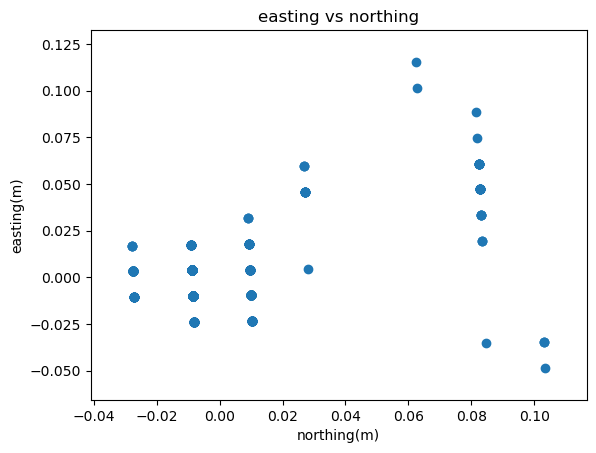

In [13]:
plot_graph('northing', 'easting', 'm', 'm', True)

In [14]:
# error = true value - measured value
def get_rsme(col_name):
    col_rsme = np.sqrt(np.square(0 - df_gps[col_name]).mean())
    return col_rsme

In [15]:
get_rsme('easting')

0.018582037806649902

In [16]:
get_rsme('northing')

0.0246772360429117

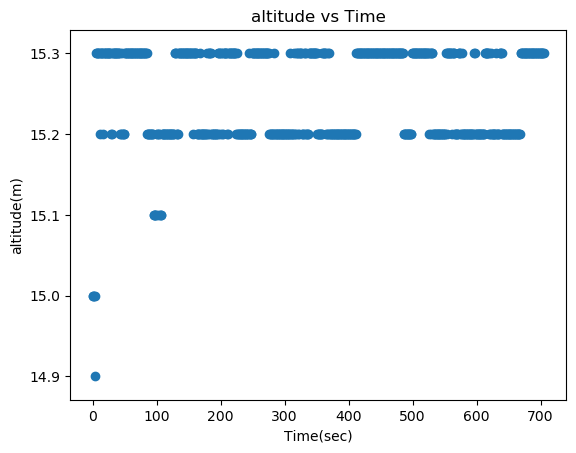

In [17]:
plot_graph('Time', 'altitude', 'sec', 'm', True)

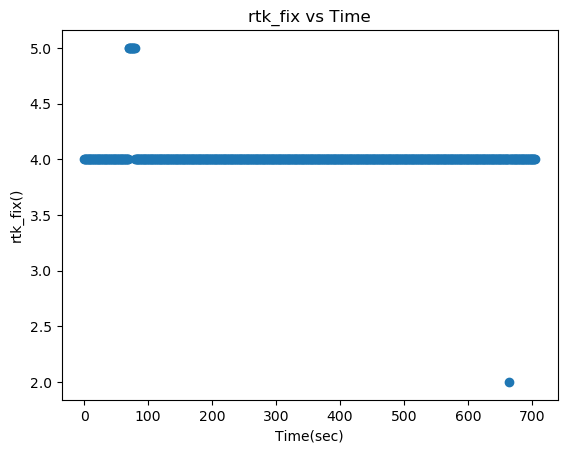

In [18]:
plot_graph('Time', 'rtk_fix', 'sec', '', True)

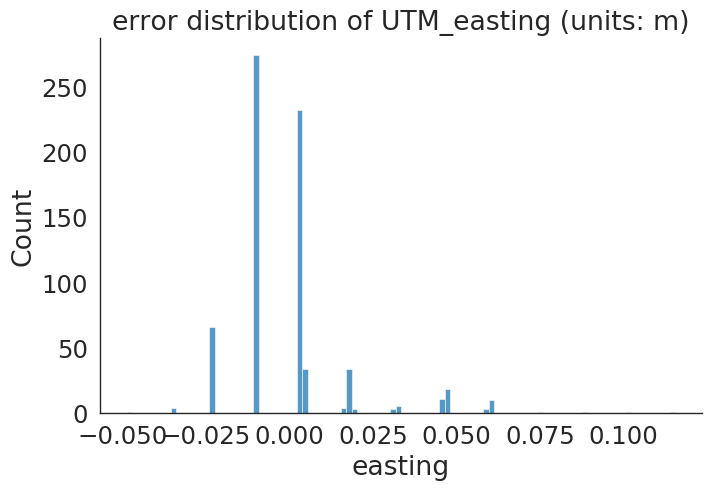

In [19]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df_gps, x="easting", kind="hist", bins=100, aspect=1.5).set(title='error distribution of UTM_easting (units: m)')

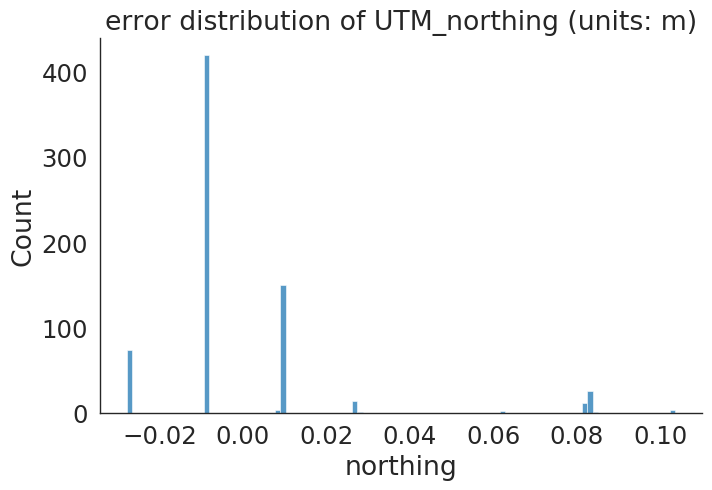

In [20]:
sns.displot(data=df_gps, x="northing", kind="hist", bins=100, aspect=1.5).set(title='error distribution of UTM_northing (units: m)')

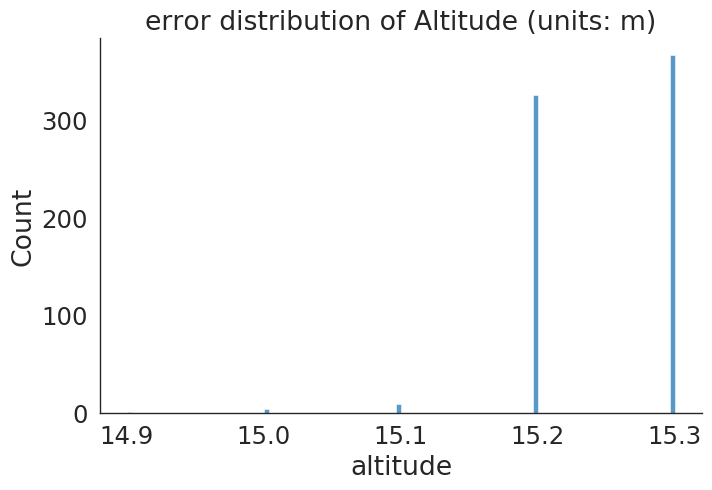

In [21]:
sns.displot(data=df_gps, x="altitude", kind="hist", bins=100, aspect=1.5).set(title='error distribution of Altitude (units: m)')

In [22]:
def get_bounds(col_name):
    col = df_gps[col_name].tolist()
    mean = np.mean(col)
    print(f'upper bound : {max(col)}')
    print(f'mean: {mean}')
    print(f'lower bound : {min(col)}')

In [23]:
get_bounds('easting')

upper bound : 0.11533567582955584
mean: 2.4981474867961226e-11
lower bound : -0.04852396302158013


In [24]:
get_bounds('northing')

upper bound : 0.1034869085997343
mean: -1.187238409566474e-11
lower bound : -0.027747387066483498


In [25]:
get_bounds('altitude')

upper bound : 15.3
mean: 15.249008498583569
lower bound : 14.9
